# homr

homr is an Optical Music Recognition (OMR) software designed to transform camera pictures of sheet music into machine-readable [MusicXML](https://www.w3.org/2021/06/musicxml40/) format. The resulting MusicXML files can be further processed using tools such as [musescore](https://musescore.com/).

[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-blue?logo=github)](https://github.com/liebharc/homr)


In [1]:
%%capture
#@title Setup
!pip install poetry
!git clone https://github.com/liebharc/homr.git
%cd homr
!poetry config virtualenvs.create false --local
!poetry install

In [2]:
%%capture
#@title Install MuseScore
!add-apt-repository --yes ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get --yes install musescore3

Saving tabi.jpg to tabi.jpg


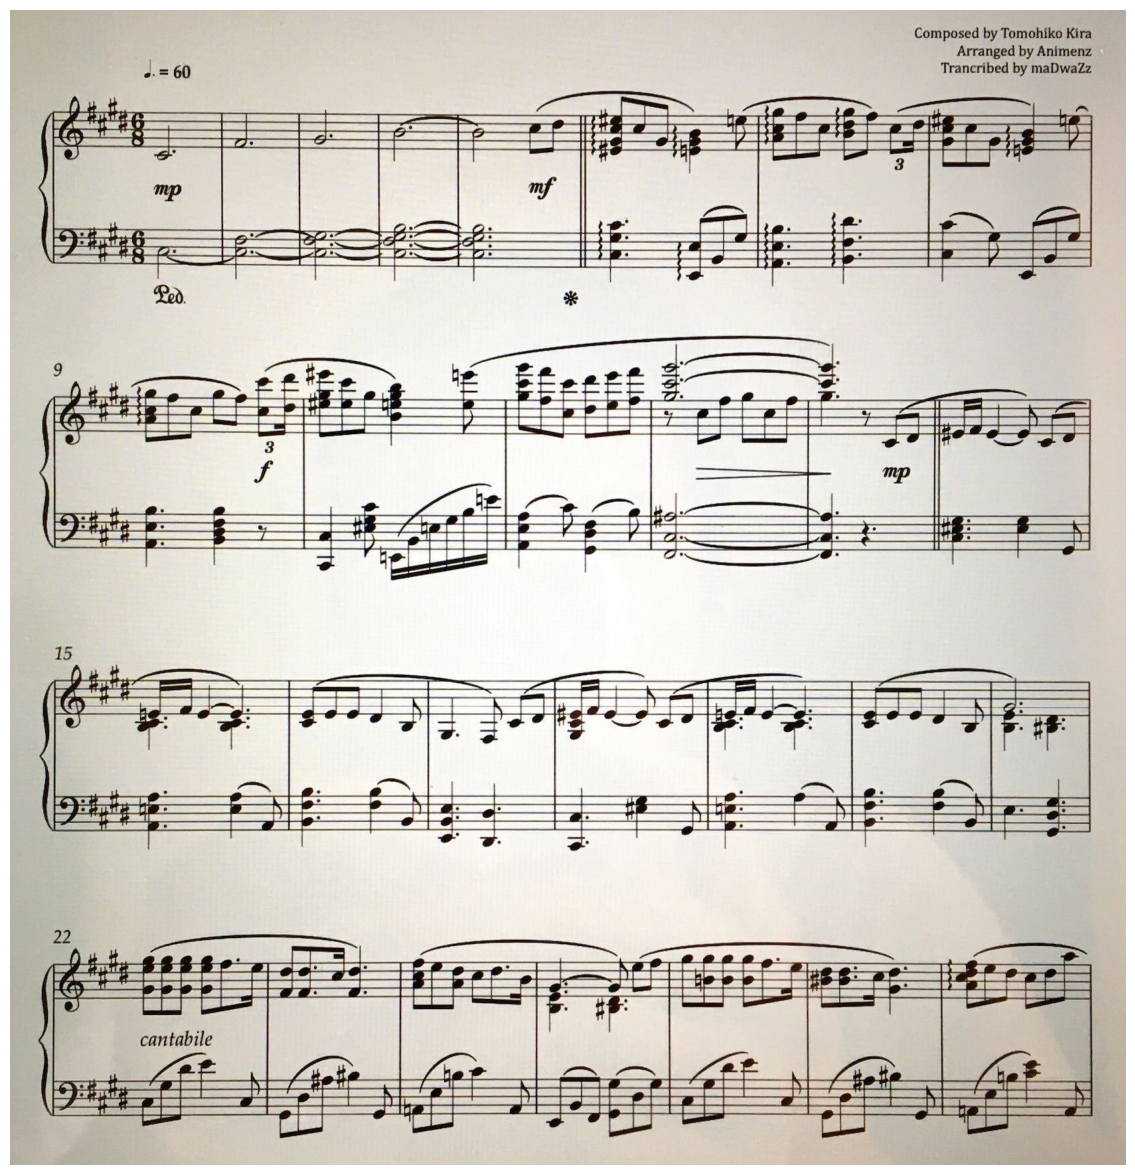

In [16]:
#@title Upload files and run recognition
from google.colab import files
from matplotlib import pyplot as plt

filenames = files.upload().keys()

for file_name in filenames:
    img = plt.imread(file_name)
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [17]:
for file_name in filenames:
    !poetry run homr "{file_name}"

Skipping virtualenv creation, as specified in config file.
Processing tabi.jpg
Extracting layers of different symbols
Creating bounds for noteheads
Creating bounds for staff_fragments
Creating bounds for clefs_keys
Creating bounds for accidentals
Creating bounds for stems_rest
Creating bounds for bar_lines
Found 1257 staff line fragments
Found 29 noteheads
Average note head height: 2.0
Found 440 bar lines
Found 0 clefs
Found 0 possible other clefs
Found 51 staff anchors
Found 7 staffs
Found 300 bar lines
Found 0 rests
After grouping there are 0 notes and 0 note groups
Found 0 accidentals
Found 7 connected staffs (after merging grand staffs, multiple voices):  [1, 1, 1, 1, 1, 1, 1]
Found title: Composed by Tomohiko Kira Arranged by Animenz Trancribed by maDwaZz
Dewarping staff 0
Dewarping staff 0 done
Running TrOmr inference on staff image 0
Taking attempt 1 with distance 49.32287565553229 Staff(G2/4 6/8 C4_half.| F4_half.| G4_half.| B4_half.| B4_half C5_eighth D5_eighth| E5#_eighth&C5_

env: DEBIAN_FRONTEND=noninteractive
env: QT_QPA_PLATFORM=offscreen
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
convert <tabi.musicxml>...
	to <tabi.mp3>
Attempting to load LAME from system search paths
Loading LAME from libmp3lame.so.0
LAME library successfully loaded
Loading soundfont: /usr/share/mscore3-3.2/sound/sf3/MuseScore_General.sf3
MIDI collision detected: newly played...
 - Note; Pitch: G#2 (sounding as G#2); Duration: Eighth; Voice: 1; Measure: 6; Beat: 1; Staff: 1
 ... interferes with already playing...
 - Note; Pitch: G#2 (sounding as G#2); Duration: Eighth; Voice: 1; Measure: 6; Beat: 1; Staff: 1
 ... which will continue to sound.
MIDI collision detected: newly played...
 - Note; Pitch: B2 (sounding as B2); Duration: Eighth; Voice: 1; Measure: 20; Beat: 4; Staff: 1
 ... interferes with already playing...
 - Note; Pitch: B2 (sounding as B2); Duration: Dotted Half; Voice: 1; Measure: 20; Beat: 1; Staff: 1
 ... which will continue to sound.
Sou

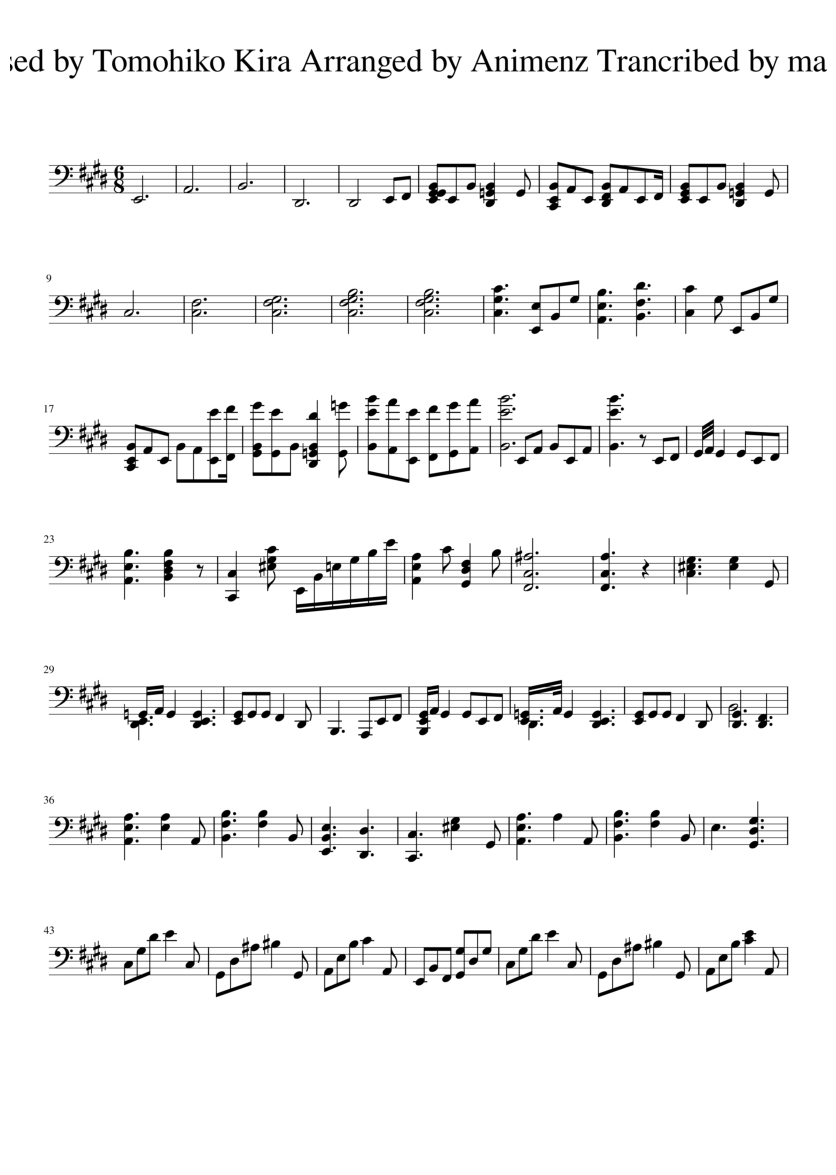

In [18]:
#@title Render MusicXML

# Copied from oemer's Colab Notebook
from matplotlib import pyplot as plt
import IPython.display as dsp


%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen


def remove_extension(file: str):
    return file[:file.rindex('.')]


for file_name in filenames:
    file_name = remove_extension(file_name)
    !musescore3 -o "{file_name}.mp3" "{file_name}.musicxml"
    !musescore3 -o "{file_name}.png" "{file_name}.musicxml"
    img = plt.imread(f"{file_name}-1.png")
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

    dsp.display(dsp.Audio(f"{file_name}.mp3"))